# **Case Study: Predictive Analytics for E-commerce**

# **Business Context:**
You are hired as a Data Science and AI for an e-commerce company named "Terra Store." Terra Store is looking to enhance its marketing strategy by predicting customer purchase behavior based on historical data. The company wants to build an AI-powered application that can provide insights into which products a customer is likely to purchase next.


# **Problem Statement:**
Terra Store has provided you with a dataset containing information about customer interactions, purchases, and product details. Your task is to develop a web-based AI application that predicts the next product a customer is likely to buy. The application should be user-friendly, allowing marketing teams to target customers more effectively.


# **Data Description:**

The dataset includes the following information:
- Customer Interactions:
- Customer ID
- Page views
- Time spent on the website

Purchase History:
- Customer ID
- Product ID
- Purchase date
- Product Details:
- Product ID
- Category
- Price
- Ratings


**customer_interactions.csv** includes information about customer interactions on the website, such as the number of page views and time spent.

**purchase_history.csv** contains records of customer purchases, including the product purchased and the date of purchase.

**product_details.csv** provides details about each product, such as its category, price, and ratings.

# **Data Exploration and Preprocessing:**
Explore the provided dataset to understand the characteristics of customer interactions and purchase history.
Perform any necessary data preprocessing steps to handle missing values or outliers.


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ndcg_score

from matplotlib import pyplot as plt
import seaborn as sns

## **Load and Preview**

In [2]:
dataset_root = '/content/drive/MyDrive/DataScience/Skillvul/dataset/'
!ls '/content/drive/MyDrive/DataScience/Skillvul/dataset/'

customer_interactions.csv	     generated_product_details.csv   product_details.csv
generated_customer_interactions.csv  generated_purchase_history.csv  purchase_history.csv


In [3]:
customer_interactions_df = pd.read_csv(f"{dataset_root}generated_customer_interactions.csv")
product_details_df = pd.read_csv(f"{dataset_root}generated_product_details.csv", sep=";")
purchase_history_df = pd.read_csv(f"{dataset_root}generated_purchase_history.csv", sep=";")

In [4]:
print(customer_interactions_df.info())
customer_interactions_df.columns = ['customer_id', 'customer_page_views', 'customer_time_spent']
customer_interactions_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  50 non-null     int64
 1   page_views   50 non-null     int64
 2   time_spent   50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB
None


,customer_id,customer_page_views,customer_time_spent
45,46,13,127
46,47,33,63
47,48,37,79
48,49,48,159
49,50,43,101


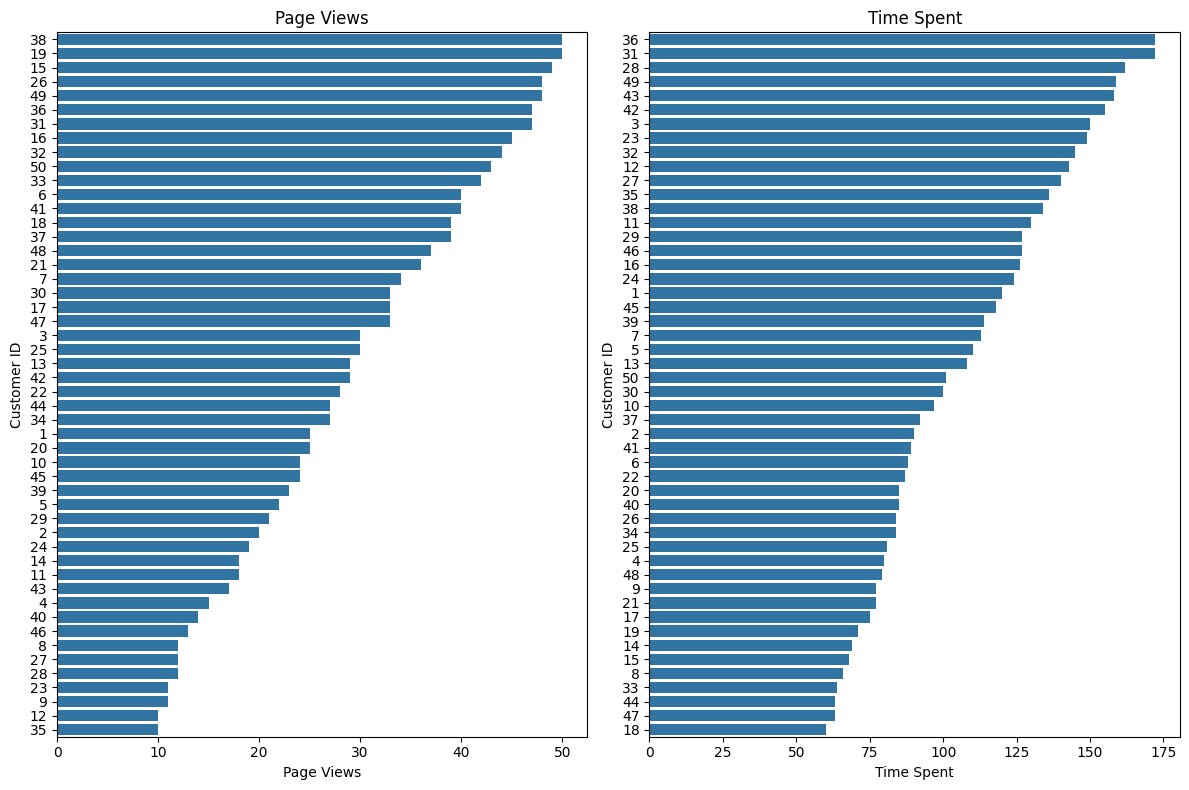

In [5]:
customer_eda = customer_interactions_df.copy()
customer_eda['customer_id'] = customer_eda['customer_id'].apply(lambda x: str(x))

# Plotting with Seaborn
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Bar plot for page views on the left
sns.barplot(x='customer_page_views', y='customer_id', data=customer_eda.sort_values('customer_page_views', ascending=False), ax=ax[0])
ax[0].set_title('Page Views')
ax[0].set_xlabel('Page Views')
ax[0].set_ylabel('Customer ID')

# Bar plot for time spent on the right
sns.barplot(x='customer_time_spent', y='customer_id', data=customer_eda.sort_values('customer_time_spent', ascending=False), ax=ax[1])
ax[1].set_title('Time Spent')
ax[1].set_xlabel('Time Spent')
ax[1].set_ylabel('Customer ID')

plt.tight_layout()
plt.show()

In [6]:
print(product_details_df.info())
product_details_df.columns = ['product_id', 'product_category', 'product_price', 'product_ratings']
product_details_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  30 non-null     int64  
 1   category    30 non-null     object 
 2   price       30 non-null     float64
 3   ratings     30 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None


,product_id,product_category,product_price,product_ratings
25,126,Electronics,23.461780,4.0
26,127,Clothing,196.354883,4.8
27,128,Clothing,209.647482,3.8
28,129,Clothing,266.227190,3.3
29,130,Electronics,467.646238,4.3


In [7]:
product_eda = product_details_df.copy()
product_eda['product_id'] = product_eda['product_id'].apply(lambda x: str(x))

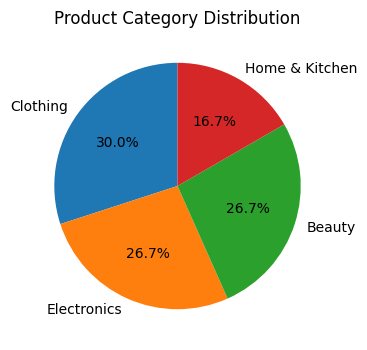

In [8]:
plt.figure(figsize=(4, 4))
plt.pie(x=product_eda['product_category'].value_counts().values, labels=product_eda['product_category'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Distribution')
plt.show()

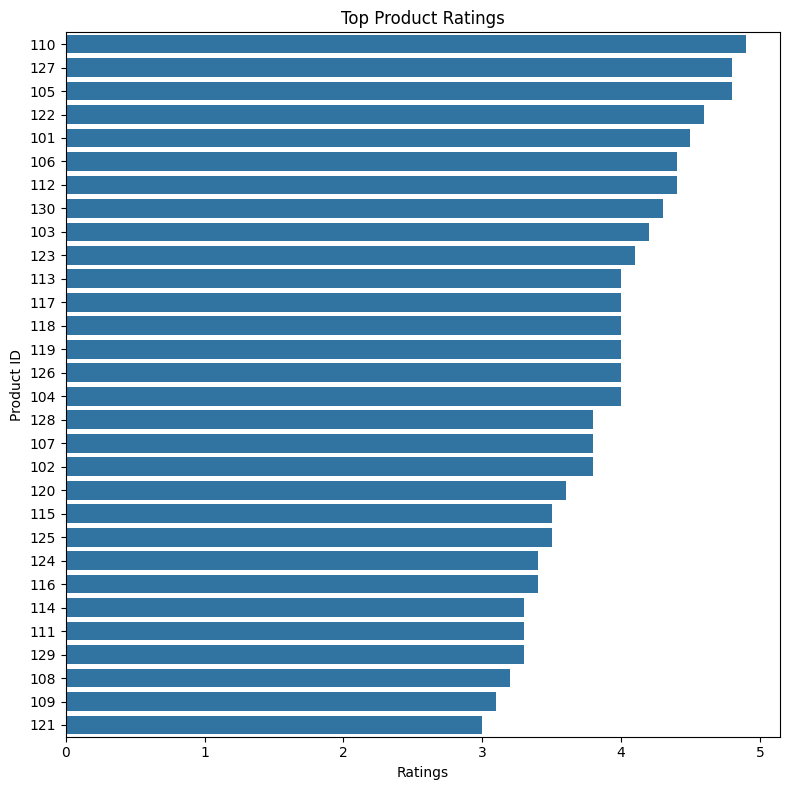

In [9]:
plt.figure(figsize=(8, 8))
sns.barplot(x='product_ratings', y='product_id', data=product_eda.sort_values('product_ratings', ascending=False))
plt.title('Top Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()

In [10]:
print(purchase_history_df.info())
purchase_history_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    306 non-null    int64 
 1   product_id     306 non-null    int64 
 2   purchase_date  306 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB
None


,customer_id,product_id,purchase_date
301,29,130,2023-01-09
302,43,107,2023-01-08
303,30,120,2023-01-31
304,6,124,2023-01-24
305,4,112,2023-01-28


In [11]:
purchase_eda = purchase_history_df.copy()
purchase_eda['customer_id'] = purchase_eda['customer_id'].apply(lambda x: str(x))
purchase_eda['product_id'] = purchase_eda['product_id'].apply(lambda x: str(x))

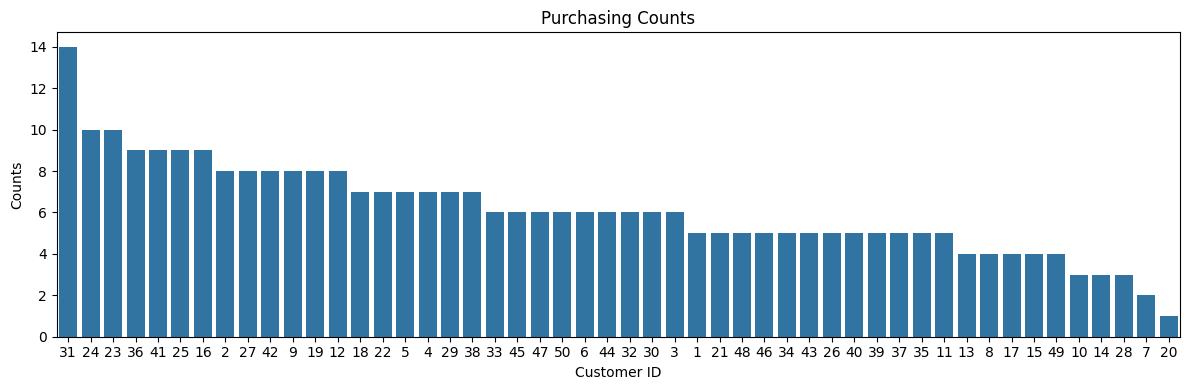

In [12]:
plt.figure(figsize=(12, 4))
sns.barplot(x=purchase_eda.value_counts('customer_id', ascending=False).index, y=purchase_eda.value_counts('customer_id', ascending=False).values)
plt.title('Purchasing Counts')
plt.xlabel('Customer ID')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

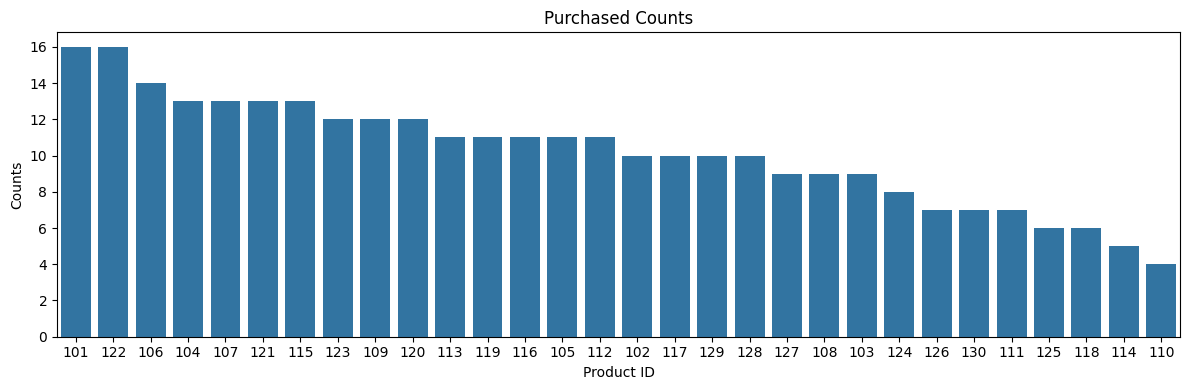

In [13]:
plt.figure(figsize=(12, 4))
sns.barplot(x=purchase_eda.value_counts('product_id', ascending=False).index, y=purchase_eda.value_counts('product_id', ascending=False).values)
plt.title('Purchased Counts')
plt.xlabel('Product ID')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

In [14]:
purchase_eda = pd.merge(purchase_history_df, product_details_df, on='product_id', how='left')

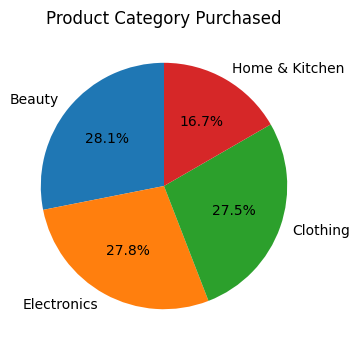

In [15]:
plt.figure(figsize=(4, 4))
plt.pie(x=purchase_eda['product_category'].value_counts().values, labels=purchase_eda['product_category'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Purchased')
plt.show()

## **Join Dataset and Select Features**

In [16]:
dataset = pd.merge(purchase_history_df, customer_interactions_df, on='customer_id', how='left')
dataset = pd.merge(dataset, product_details_df, on='product_id', how='left')
dataset

,customer_id,product_id,purchase_date,customer_page_views,customer_time_spent,product_category,product_price,product_ratings
0,1,101,2023-01-01,25,120,Electronics,500.000000,4.5
1,1,105,2023-01-05,25,120,Electronics,800.000000,4.8
2,2,102,2023-01-02,20,90,Clothing,50.000000,3.8
3,3,103,2023-01-03,30,150,Home & Kitchen,200.000000,4.2
4,4,104,2023-01-04,15,80,Beauty,30.000000,4.0
...,...,...,...,...,...,...,...,...
301,29,130,2023-01-09,21,127,Electronics,467.646238,4.3
302,43,107,2023-01-08,17,158,Beauty,237.204344,3.8
303,30,120,2023-01-31,33,100,Clothing,80.100346,3.6
304,6,124,2023-01-24,40,88,Beauty,352.408454,3.4


In [17]:
dataset = dataset[['customer_id', 'product_id', 'product_ratings']]
dataset

,customer_id,product_id,product_ratings
0,1,101,4.5
1,1,105,4.8
2,2,102,3.8
3,3,103,4.2
4,4,104,4.0
...,...,...,...
301,29,130,4.3
302,43,107,3.8
303,30,120,3.6
304,6,124,3.4


## **Feature Engineering**

In [18]:
ratings_matrix_fillna = pd.pivot_table(dataset, index='customer_id', columns='product_id', values='product_ratings')
ratings_matrix_fillna.tail()

product_id,101,102,103,104,105,106,107,108,109,110,...,121,122,123,124,125,126,127,128,129,130
customer_id,,,,,,,,,,,,,,,,,,,,,
46,4.5,NaN,NaN,4.0,4.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,3.1,NaN,...,NaN,4.6,NaN,3.4,NaN,NaN,NaN,NaN,3.3,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,3.8,3.2,NaN,4.9,...,NaN,4.6,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN


In [19]:
ratings_matrix_fillna_norm = ratings_matrix_fillna.subtract(ratings_matrix_fillna.mean(axis=1), axis=0)
ratings_matrix_fillna_norm.tail()

product_id,101,102,103,104,105,106,107,108,109,110,...,121,122,123,124,125,126,127,128,129,130
customer_id,,,,,,,,,,,,,,,,,,,,,
46,0.24,NaN,NaN,-0.26,0.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,0.48,NaN,NaN,NaN,NaN,NaN,-0.62,NaN,...,NaN,0.880000,NaN,-0.32,NaN,NaN,NaN,NaN,-0.42,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.40,NaN,...,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,-0.316667,-0.916667,NaN,0.783333,...,NaN,0.483333,NaN,NaN,NaN,NaN,0.683333,NaN,NaN,NaN


In [20]:
customer_similarity_matrix = ratings_matrix_fillna_norm.T.corr()
customer_similarity_matrix.tail()

customer_id,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
customer_id,,,,,,,,,,,,,,,,,,,,,
46,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
47,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
50,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


# **Model Development**

In [21]:
customer_id = 30
threshold = 0.3

In [22]:
customer_similarity_matrix_comparison = customer_similarity_matrix.copy()
customer_similarity_matrix_comparison.tail()

customer_id,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
customer_id,,,,,,,,,,,,,,,,,,,,,
46,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
47,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
50,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


In [23]:
customer_similarity_matrix_comparison.drop(index=customer_id, inplace=True)
customer_similarity_matrix_comparison.tail()

customer_id,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
customer_id,,,,,,,,,,,,,,,,,,,,,
46,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
47,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
50,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


In [24]:
similar_customer = customer_similarity_matrix_comparison[customer_similarity_matrix_comparison[customer_id]>threshold][customer_id]
similar_customer.sort_values(ascending=False)

customer_id
2     1.0
3     1.0
4     1.0
9     1.0
12    1.0
18    1.0
19    1.0
22    1.0
23    1.0
29    1.0
39    1.0
44    1.0
45    1.0
Name: 30, dtype: float64

In [25]:
customer_id_purchased = ratings_matrix_fillna_norm[ratings_matrix_fillna_norm.index == customer_id].dropna(axis=1, how='all')
customer_id_purchased

product_id,102,113,116,120,123
customer_id,,,,,
30,0.02,0.22,-0.38,-0.18,0.32


In [26]:
similar_customer_purchased = ratings_matrix_fillna_norm[ratings_matrix_fillna_norm.index.isin(similar_customer.index)].dropna(axis=1, how='all')
similar_customer_purchased

product_id,101,102,103,104,106,107,108,109,110,111,...,118,119,120,121,122,123,124,126,127,130
customer_id,,,,,,,,,,,,,,,,,,,,,
2,0.385714,-0.314286,NaN,-0.114286,0.285714,-0.314286,NaN,NaN,0.785714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-0.183333,0.216667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016667,0.016667,-0.383333,NaN,NaN,NaN,NaN,NaN,NaN,0.316667
4,NaN,NaN,NaN,0.120000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,-0.083333,NaN,0.116667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.283333,NaN,NaN,NaN,NaN,0.116667,NaN,NaN
12,NaN,0.100000,NaN,NaN,0.700000,NaN,NaN,NaN,NaN,-0.40,...,NaN,0.300000,NaN,NaN,NaN,NaN,-0.30,NaN,NaN,NaN
18,0.514286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.385714,-0.985714,NaN,NaN,NaN,0.014286,0.814286,NaN
19,NaN,0.150000,0.550000,0.350000,0.750000,NaN,NaN,-0.550000,NaN,-0.35,...,NaN,NaN,NaN,-0.650000,NaN,NaN,NaN,NaN,NaN,NaN
22,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.016667,NaN,-0.983333,NaN,0.116667,NaN,NaN,NaN,0.316667
23,0.410000,-0.290000,0.110000,NaN,0.310000,NaN,-0.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,-0.090000,NaN,0.210000


In [27]:
similar_customer_purchased.drop(customer_id_purchased.columns, axis=1, inplace=True, errors='ignore')
similar_customer_purchased

product_id,101,103,104,106,107,108,109,110,111,112,...,115,117,118,119,121,122,124,126,127,130
customer_id,,,,,,,,,,,,,,,,,,,,,
2,0.385714,NaN,-0.114286,0.285714,-0.314286,NaN,NaN,0.785714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.216667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.016667,0.016667,NaN,NaN,NaN,NaN,NaN,0.316667
4,NaN,NaN,0.120000,NaN,NaN,NaN,NaN,NaN,NaN,0.520000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.116667,NaN,NaN,NaN,NaN,NaN,NaN,0.516667,...,-0.383333,NaN,NaN,NaN,NaN,NaN,NaN,0.116667,NaN,NaN
12,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,NaN,-0.40,NaN,...,NaN,NaN,NaN,0.300000,NaN,NaN,-0.30,NaN,NaN,NaN
18,0.514286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.014286,NaN,NaN,-0.985714,NaN,NaN,0.014286,0.814286,NaN
19,NaN,0.550000,0.350000,0.750000,NaN,NaN,-0.550000,NaN,-0.35,NaN,...,NaN,NaN,NaN,NaN,-0.650000,NaN,NaN,NaN,NaN,NaN
22,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.016667,-0.983333,NaN,NaN,NaN,NaN,0.316667
23,0.410000,0.110000,NaN,0.310000,NaN,-0.89,NaN,NaN,NaN,0.310000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.090000,NaN,0.210000


In [28]:
recommendation_list = [(product, similar_customer_purchased[product].dropna(axis=0).mean()) for product in similar_customer_purchased]
recommendation_list = sorted(recommendation_list, key=lambda x: x[1], reverse=True)
recommendation_list

[(127, 0.8142857142857136),
 (110, 0.7857142857142865),
 (122, 0.586666666666666),
 (106, 0.4758095238095241),
 (101, 0.46133333333333315),
 (112, 0.44888888888888934),
 (103, 0.31200000000000017),
 (130, 0.29583333333333317),
 (104, 0.11809523809523825),
 (119, 0.11111111111111101),
 (118, 0.01666666666666705),
 (126, 0.013650793650793544),
 (117, -0.0028571428571433355),
 (107, -0.08214285714285707),
 (124, -0.27500000000000013),
 (111, -0.3750000000000002),
 (114, -0.40000000000000036),
 (115, -0.4544444444444446),
 (109, -0.7583333333333335),
 (121, -0.817261904761905),
 (108, -0.8899999999999997)]

In [29]:
for product in list(customer_id_purchased.columns):
  details = product_details_df[product_details_df['product_id'] == product]
  print(details.values[0][:2])

[102 'Clothing']
[113 'Home & Kitchen']
[116 'Home & Kitchen']
[120 'Clothing']
[123 'Clothing']


In [30]:
n_recommendation = 10
for product in recommendation_list[:n_recommendation]:
  details = product_details_df[product_details_df['product_id'] == product[0]]
  print(details.values[0][:2], product[1])

[127 'Clothing'] 0.8142857142857136
[110 'Clothing'] 0.7857142857142865
[122 'Beauty'] 0.586666666666666
[106 'Electronics'] 0.4758095238095241
[101 'Electronics'] 0.46133333333333315
[112 'Clothing'] 0.44888888888888934
[103 'Home & Kitchen'] 0.31200000000000017
[130 'Electronics'] 0.29583333333333317
[104 'Beauty'] 0.11809523809523825
[119 'Home & Kitchen'] 0.11111111111111101


# **Wrap Up**

In [31]:
import pandas as pd

dataset_root = '/content/drive/MyDrive/DataScience/Skillvul/dataset/'

customer_interactions_df = pd.read_csv(f"{dataset_root}generated_customer_interactions.csv")
customer_interactions_df.columns = ['customer_id', 'customer_page_views', 'customer_time_spent']

product_details_df = pd.read_csv(f"{dataset_root}generated_product_details.csv", sep=";")
product_details_df.columns = ['product_id', 'product_category', 'product_price', 'product_ratings']

purchase_history_df = pd.read_csv(f"{dataset_root}generated_purchase_history.csv", sep=";")

def prepare_recommendation(customer_interactions_df, product_details_df, purchase_history_df, threshold=0.3, n_recommendation=20):
  dataset = pd.merge(purchase_history_df, customer_interactions_df, on='customer_id', how='left')
  dataset = pd.merge(dataset, product_details_df, on='product_id', how='left')
  dataset = dataset[['customer_id', 'product_id', 'product_ratings']]

  ratings_matrix_fillna = pd.pivot_table(dataset, index='customer_id', columns='product_id', values='product_ratings')
  ratings_matrix_fillna_norm = ratings_matrix_fillna.subtract(ratings_matrix_fillna.mean(axis=1), axis=0)
  customer_similarity_matrix = ratings_matrix_fillna_norm.T.corr()

  customer_list = list(set(customer_interactions_df['customer_id']))
  customers_recommendation_lists = {}
  for customer_id in customer_list:
    customer_similarity_matrix_comparison = customer_similarity_matrix.copy()
    customer_similarity_matrix_comparison.drop(index=customer_id, inplace=True)

    similar_customer = customer_similarity_matrix_comparison[customer_similarity_matrix_comparison[customer_id]>threshold][customer_id]
    customer_id_purchased = ratings_matrix_fillna_norm[ratings_matrix_fillna_norm.index == customer_id].dropna(axis=1, how='all')
    similar_customer_purchased = ratings_matrix_fillna_norm[ratings_matrix_fillna_norm.index.isin(similar_customer.index)].dropna(axis=1, how='all')
    similar_customer_purchased.drop(customer_id_purchased.columns, axis=1, inplace=True, errors='ignore')

    recommendation_list = [(product, similar_customer_purchased[product].dropna(axis=0).mean()) for product in similar_customer_purchased]
    recommendation_list = sorted(recommendation_list, key=lambda x: x[1], reverse=True)

    history = []
    for product in list(customer_id_purchased.columns):
      details = product_details_df[product_details_df['product_id'] == product]
      product_details = {
          'product_id' : details.values[0][0],
          'product_category' : details.values[0][1],
          'product_price' : details.values[0][2],
          'product_rating' : details.values[0][3],

      }
      history.append(product_details)

    recommendation = []
    for product in recommendation_list[:n_recommendation]:
      details = product_details_df[product_details_df['product_id'] == product[0]]
      product_details = {
          'product_id' : details.values[0][0],
          'product_category' : details.values[0][1],
          'product_price' : details.values[0][2],
          'product_rating' : details.values[0][3],
      }
      recommendation.append(product_details)

    recommendation_for_a_customer = {
      'history' : history,
      'recommendation' : recommendation
    }
    customers_recommendation_lists[customer_id] = recommendation_for_a_customer

  return customers_recommendation_lists

In [32]:
recommendation_index = prepare_recommendation(customer_interactions_df, product_details_df, purchase_history_df, threshold=0.3)

In [41]:
import json
print(json.dumps(recommendation_index[1], indent=2))

{
  "history": [
    {
      "product_id": 101,
      "product_category": "Electronics",
      "product_price": 500.0,
      "product_rating": 4.5
    },
    {
      "product_id": 105,
      "product_category": "Electronics",
      "product_price": 800.0,
      "product_rating": 4.8
    },
    {
      "product_id": 109,
      "product_category": "Beauty",
      "product_price": 50.99378114457945,
      "product_rating": 3.1
    },
    {
      "product_id": 122,
      "product_category": "Beauty",
      "product_price": 45.134227339858185,
      "product_rating": 4.6
    },
    {
      "product_id": 127,
      "product_category": "Clothing",
      "product_price": 196.3548832186876,
      "product_rating": 4.8
    }
  ],
  "recommendation": [
    {
      "product_id": 110,
      "product_category": "Clothing",
      "product_price": 23.860231753954828,
      "product_rating": 4.9
    },
    {
      "product_id": 106,
      "product_category": "Electronics",
      "product_price": 319.42

# **Evaluation - NDCG@5**

The evaluation of the recommendation system involves computing the nDCG@5 metric, where the relevance scores are determined by assigning a score of 1 for each product category that exists in the purchasing history, multiplied by the number of occurrences of the same product category in the purchasing history. For product categories that do not exist in the purchasing history, a score of 0 is assigned. The resulting scores are organized into a list representing the predicted relevance. The nDCG@5 is then calculated by comparing this list with the sorted list of true relevance, sorted in descending order of relevance scores, to assess the system's performance in recommending relevant products.

In [45]:
# K - the top K ranked item of the recommendation list
k = 5

# Calculate NDCG@K
score = [] # Store NDCG@K score recommendation for each customer_id
for customer_id in recommendation_index:
  score_cid = [] # Store NDCG@K score per recommendation list for customer id
  customer_index = recommendation_index[customer_id] # Get index for customer_id
  history = [product['product_category'] for product in customer_index['history']] # Get purchase history
  recommendation = [product['product_category'] for product in customer_index['recommendation']][:k] # Get recommendation list on top K

  for product in recommendation:
    product_n = history.count(product)
    if product in history:
      # If product category in recommendation exist in purchasing history the score: 1 * The Number of Product Category in Purchase History
      score_cid.append(1*product_n)
    else:
      # If not exist the score will 0
      score_cid.append(0)

  # Get only recommendation list with more than equal the K
  if len(recommendation) >= k:
    true_relevance = np.asarray([sorted(score_cid, reverse=True)]) # True Relevance - bigger value, more relevance
    predicted_relevance = np.asarray([score_cid]) # Prediction for the Relevance
    score_cid = ndcg_score(true_relevance, predicted_relevance) # Calculate the NDCG@K score
    score.append(score_cid)

# Average NDCG@K Score
print(sum(score)/len(score))

0.8484064772401175


# **Live Dashbord :**
https://product-recommendation-dashboard.vercel.app/